In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('C:/Users/aacas/Documents/Intro a Cs de Datos/Proyecto/otros archivos/df_limpio.csv', encoding='utf-8', decimal=',')
df

,Marca,Modelo,Año,Kilometraje,Transmision,Precio
0,suzuki,baleno,2021,40000,1,11950000
1,suzuki,baleno,2019,55000,1,7950000
2,suzuki,baleno,2022,29588,1,10990000
3,suzuki,baleno,2021,51622,1,10290000
4,suzuki,baleno,2020,41113,1,9490000
...,...,...,...,...,...,...
1026,chery,tiggo-2,2018,70530,1,9980000
1027,chery,tiggo-2,2021,27000,2,11480000
1028,chery,tiggo-2,2023,814,1,10490000
1029,chery,tiggo-2,2021,16000,1,9590000


Seaborn Heatmap

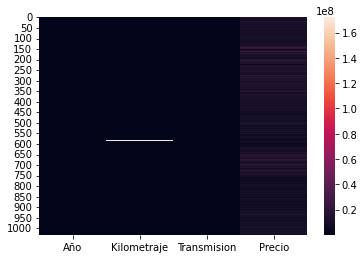

In [44]:
df_heatmap = df[['Año', 'Kilometraje', 'Transmision','Precio']]
sns.heatmap(df_heatmap)
plt.show()

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Cono tenemos solo 2 valores para la transmisión podemos separar el df en 2

[(0.0, 250000.0)]

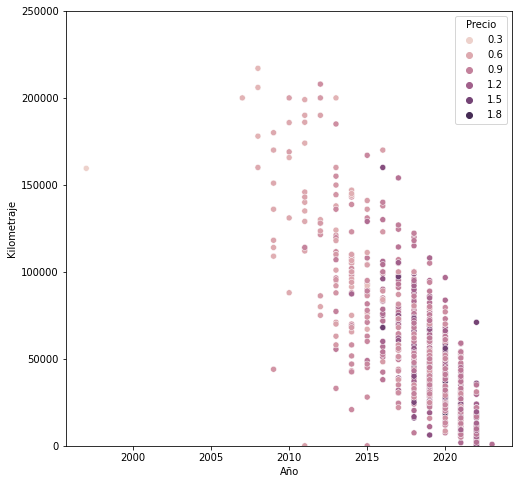

In [46]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_manual = df[df['Transmision']==1]

graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='Precio')
graph.set(ylim=(0, 250000))

[(0.0, 250000.0)]

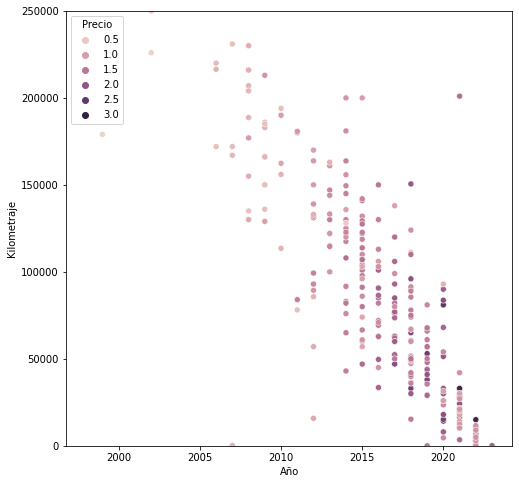

In [47]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_automatico = df[df['Transmision']==2]

graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='Precio')
graph.set(ylim=(0, 250000))

Se observa que hay una correlación(relativamente lineal), mientras más nuevo es el auto y menos kilometraje tiene más caro es el auto

# Clustering

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [30]:
# normalizar datos
df = df[df['Kilometraje']<=250000]
df = df[df['Año']>=2005]
df_numerico = df[['Año', 'Kilometraje', 'Transmision','Precio']]
scaler=StandardScaler()
dat_sc=scaler.fit_transform(df_numerico)

In [31]:
# método del codo para definir número de clústers
inertia = []
kmax = 15
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(dat_sc)

    #print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

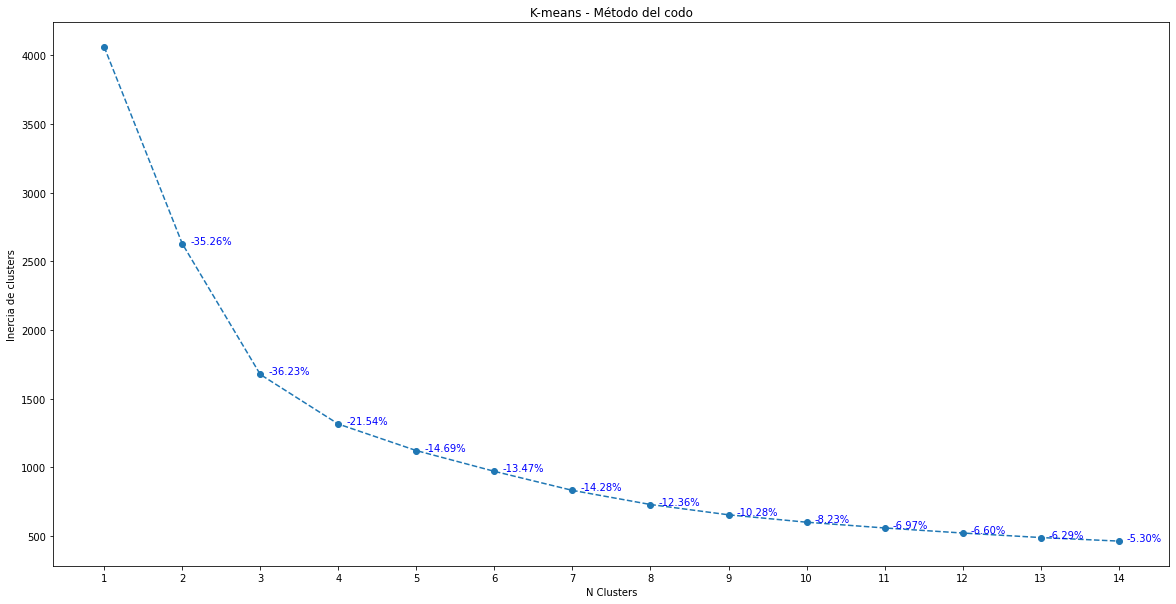

In [32]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

Vamos a considerar 4 clústers

In [37]:
kmeans = KMeans(n_clusters=4,random_state=0)
kcls = kmeans.fit(dat_sc)
df['kcls_labels']=kcls.labels_

In [38]:
df

,Marca,Modelo,Año,Kilometraje,Transmision,Precio,kcls_labels
0,suzuki,baleno,2021,40000,1,11950000,0
1,suzuki,baleno,2019,55000,1,7950000,0
2,suzuki,baleno,2022,29588,1,10990000,0
3,suzuki,baleno,2021,51622,1,10290000,0
4,suzuki,baleno,2020,41113,1,9490000,0
...,...,...,...,...,...,...,...
1026,chery,tiggo-2,2018,70530,1,9980000,0
1027,chery,tiggo-2,2021,27000,2,11480000,3
1028,chery,tiggo-2,2023,814,1,10490000,0
1029,chery,tiggo-2,2021,16000,1,9590000,0


C:\Users\aacas\AppData\Local\Temp\ipykernel_10156\2608927825.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  graph = sns.scatterplot(data=df, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])


[(0.0, 250000.0)]

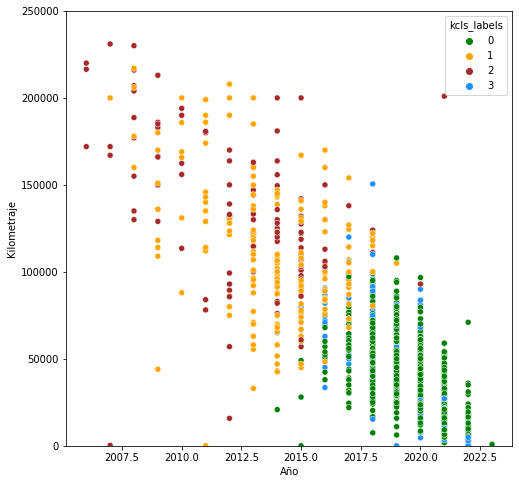

In [39]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

graph = sns.scatterplot(data=df, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])
graph.set(ylim=(0, 250000))

C:\Users\aacas\AppData\Local\Temp\ipykernel_10156\3876128743.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])


[(0.0, 250000.0)]

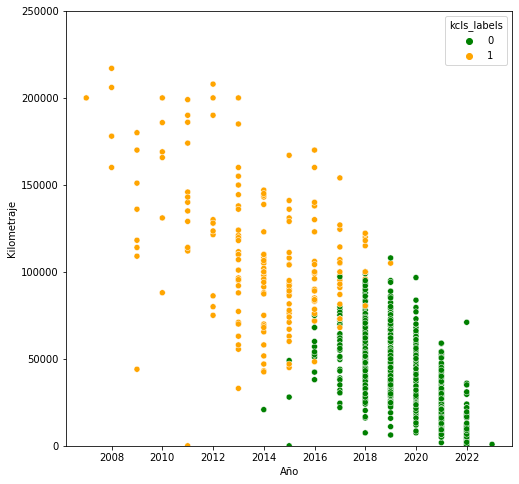

In [40]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_manual = df[df['Transmision']==1]

graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])
graph.set(ylim=(0, 250000))

C:\Users\aacas\AppData\Local\Temp\ipykernel_10156\3368902766.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='kcls_labels', palette=['orange', 'green', 'brown','dodgerblue','red', 'purple'])


[(0.0, 250000.0)]

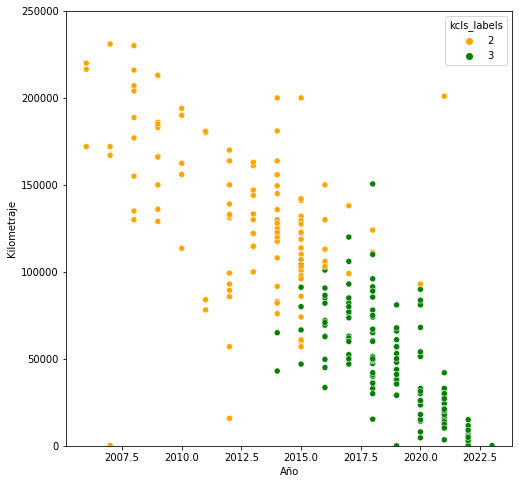

In [42]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_automatico = df[df['Transmision']==2]

graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='kcls_labels', palette=['orange', 'green', 'brown','dodgerblue','red', 'purple'])
graph.set(ylim=(0, 250000))

No tiene mucho sentido, no parece haber más relación que dividir por un rango de años

# DBSCAN

# Regresión

In [15]:
# división de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Dividimos el dataframe de entrada, la misma separación de datos para todos los modelos
train,test = train_test_split(df, test_size=0.2, random_state=40) #para reproducir resultados

y_train = train.Precio
y_test = test.Precio

x_train = train[['Año', 'Kilometraje', 'Transmision']]
x_test = test[['Año', 'Kilometraje', 'Transmision']]

x_train

,Año,Kilometraje,Transmision
674,2016,103000,2
822,2018,35000,1
712,2010,194000,2
766,2017,58000,1
796,2022,4850,1
...,...,...,...
626,2018,15300,2
1016,2021,37000,1
165,2014,125000,2
7,2019,11000,1


In [16]:
# Diccionarios para guardar errores, coeficientes
# comparamos los datos de entrenamiento y de prueba

coef_regresiones = {}

dic_R2_error_train = {}
dic_rmse_error_train = {}

dic_R2_error_test = {}
dic_rmse_error_test = {}

## Regresión Lineal

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg=LinearRegression()
# entrenar modelo con datos de entrenamiento
linreg.fit(x_train, y_train)
y_pred_train=linreg.predict(x_train)
# métricas de error entrenamiento
R2_lineal_train=linreg.score(x_train, y_train)
rmse_lineal_train=mean_squared_error(y_train, y_pred_train)

coef_regresiones['Regresión Lineal'] = linreg.coef_
dic_R2_error_train['Regresión Lineal'] = R2_lineal_train
dic_rmse_error_train['Regresión Lineal'] = rmse_lineal_train

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(x_test)
R2_lineal_test=linreg.score(x_test, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)
# métricas de error prueba
R2_lineal_test = linreg.score(x_test, y_test)
rmse_lineal_test=mean_squared_error(y_test, y_pred_test)

dic_R2_error_test['Regresión Lineal'] = R2_lineal_test
dic_rmse_error_test['Regresión Lineal'] = rmse_lineal_test

In [18]:
print(dic_R2_error_train['Regresión Lineal'], dic_rmse_error_train['Regresión Lineal'])

print(dic_R2_error_test['Regresión Lineal'], dic_rmse_error_test['Regresión Lineal'])

0.4750230450939137 7025779287447.874
-0.2832822972263267 15278210728256.22


## Regresión Ridge

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


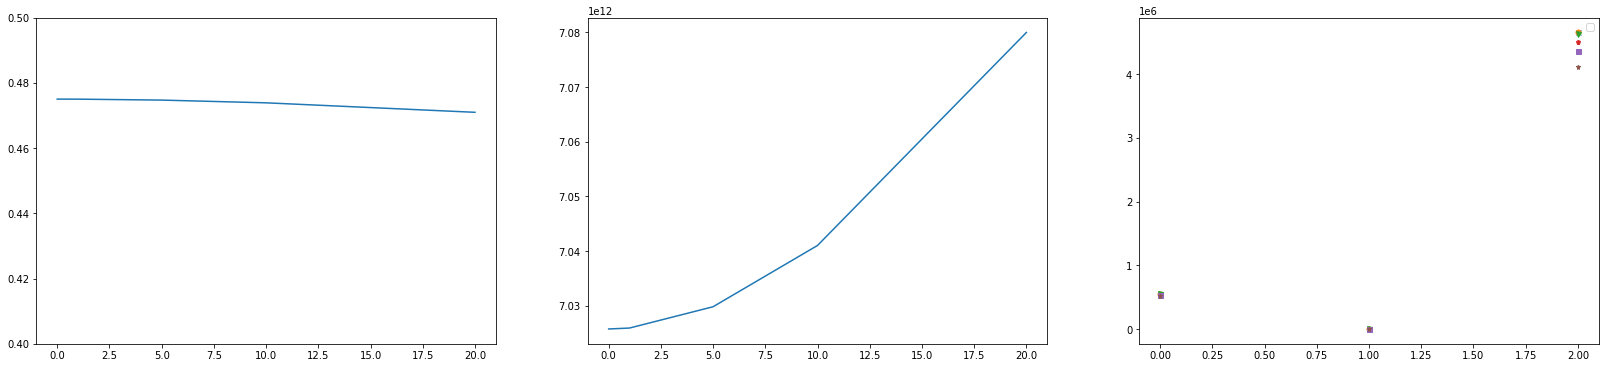

In [19]:
from sklearn.linear_model import Ridge

dic_error_R2_ridge = {}
dic_error_rsme_ridge = {}
dic_coefs_ridge = {}

alphas = [0.001, 0.01,1, 5, 10, 20]
for na,al in enumerate(alphas): 
    #print('Alpha:',al)
    rreg = Ridge(alpha=al)
    rreg.fit(x_train, y_train)

    y_train_pred = rreg.predict(x_train)
    train_score = rreg.score(x_train,y_train)
    dic_error_R2_ridge[al] = train_score
    dic_error_rsme_ridge[al] = mean_squared_error(y_train_pred, y_train)
    dic_coefs_ridge[al] = rreg.coef_

    # por ahora solo probar con datos de entrenamiento
    #y_test_pred = rreg.predict(x_test)
    #test_score = rreg.score(x_test, y_test)

# gráficos
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores de alpha
ax1.plot(dic_error_R2_ridge.keys(), dic_error_R2_ridge.values())
ax1.set_ylim(0.4, 0.5)
# ax2 : RSME para los valores de alpha
ax2.plot(dic_error_rsme_ridge.keys(), dic_error_rsme_ridge.values())
# ax3: coef para los valores de alpha
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[0.001], linestyle='None', marker='x', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[0.01], linestyle='None', marker='o', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[1], linestyle='None', marker='v', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[5], linestyle='None', marker='p', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[10], linestyle='None', marker='s', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[20], linestyle='None', marker='*', markersize=5)
ax3.legend()    # agregar legend para diferenciar los valores de alpha
#.plot(np.arange(d+1),rreg.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)

## Lasso

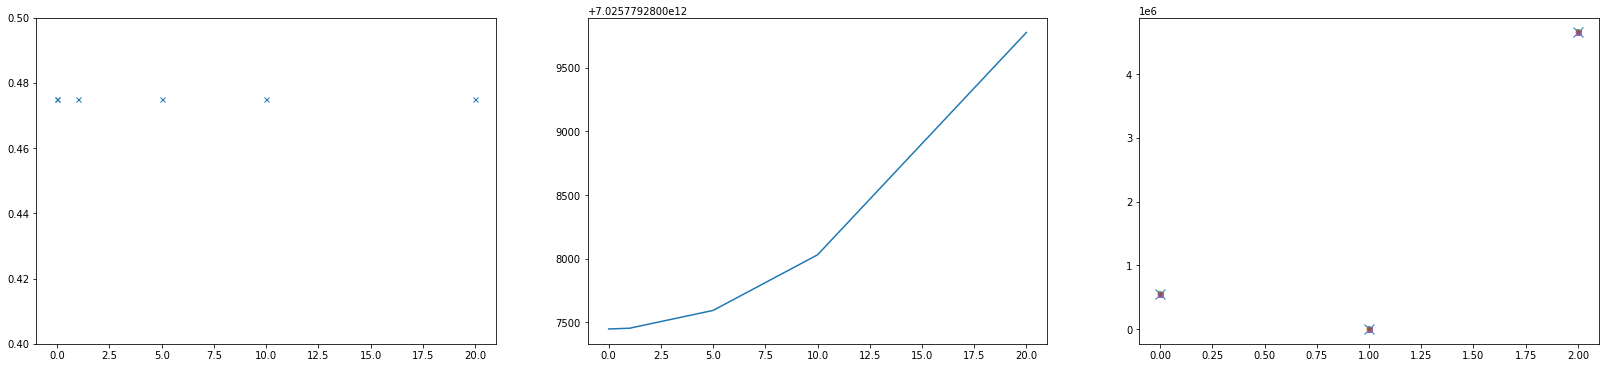

In [21]:
from sklearn.linear_model import Lasso

dic_error_R2_lasso = {}
dic_error_rsme_lasso = {}
dic_coefs_lasso = {}

alphas = [0.001, 0.01,1, 5, 10, 20]
for na,al in enumerate(alphas):
    lasso = Lasso(alpha=al)
    lasso.fit(x_train, y_train)

    #coeficientes de la regresión
    #print(rreg.coef_)
    dic_coefs_lasso[al] = lasso.coef_

    #predecimos respuesta para datos de entrenamiento y prueba
    y_train_pred = lasso.predict(x_train)
    y_test_pred = lasso.predict(x_test)

    #Cálculo de error (MSE) para datos de entrenamiento y prueba
    dic_error_rsme_lasso[al] = mean_squared_error(y_train_pred, y_train)
    #validation_error.append(mean_squared_error(y_test_pred, y_test))

    train_score = lasso.score(x_train,y_train)
    dic_error_R2_lasso[al] = train_score
    #test_score = lasso.score(x_test, y_test)

# gráficos
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores de alpha
ax1.plot(dic_error_R2_lasso.keys(), dic_error_R2_lasso.values(), linestyle='None', marker='x', markersize=5)
ax1.set_ylim(0.4, 0.5)
# ax2 : RSME para los valores de alpha
ax2.plot(dic_error_rsme_lasso.keys(), dic_error_rsme_lasso.values())
# ax3: coef para los valores de alpha
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[0.001], linestyle='None', marker='x', markersize=10)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[0.01], linestyle='None', marker='o', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[1], linestyle='None', marker='v', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[5], linestyle='None', marker='p', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[10], linestyle='None', marker='s', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[20], linestyle='None', marker='*', markersize=5)
#ax3.legend()    # agregar legend para diferenciar los valores de alpha